In [1]:
#hide
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 460kB 9.0MB/s 
ERROR: voila 0.2.6 has requirement nbconvert<7,>=6.0.0, but you'll have nbconvert 5.6.1 which is incompatible.
ERROR: google-colab 1.0.0 has requirement tornado~=5.1.0; python_version >= "3.0", but you'll have tornado 6.1 which is incompatible.


In [2]:
#hide
from fastbook import *
from fastai.vision.widgets import *

In [3]:
%cd '/content/gdrive/MyDrive/Colab Notebooks/fastbook-master/'

/content/gdrive/MyDrive/Colab Notebooks/fastbook-master


# From Model to Production

## The Practice of Deep Learning

### Starting Your Project

### The State of Deep Learning

#### Computer vision

#### Text (natural language processing)

#### Combining text and images

#### Tabular data

#### Recommendation systems

#### Other data types

### The Drivetrain Approach

## Gathering Data

# clean
To download images with Bing Image Search, sign up at [Microsoft Azure](https://azure.microsoft.com/en-us/services/cognitive-services/bing-web-search-api/) for a free account. You will be given a key, which you can copy and enter in a cell as follows (replacing 'XXX' with your key and executing it):

Using Bing..

In [4]:
# key = os.environ.get('AZURE_SEARCH_KEY', 'XXX')

In [5]:
# search_images_bing

In [6]:
# results = search_images_bing(key, 'grizzly bear')
# ims = results.attrgot('content_url')
# len(ims)

In [7]:
# #hide
# ims = ['http://3.bp.blogspot.com/-S1scRCkI3vY/UHzV2kucsPI/AAAAAAAAA-k/YQ5UzHEm9Ss/s1600/Grizzly%2BBear%2BWildlife.jpg']

Using DuckDuckGo..

In [8]:
def search_images_ddg_corrected(term, max_images=200):
    "Search for `term` with DuckDuckGo and return a unique urls of about `max_images` images"
    assert max_images<1000
    url = 'https://duckduckgo.com/'
    res = urlread(url,data={'q':term})
    searchObj = re.search(r'vqd=([\d-]+)\&', res)
    assert searchObj
    requestUrl = url + 'i.js'
    params = dict(l='us-en', o='json', q=term, vqd=searchObj.group(1), f=',,,', p='1', v7exp='a')
    urls,data = set(),{'next':1}
    while len(urls)<max_images and 'next' in data:
        try:
            data = urljson(requestUrl,data=params)
            urls.update(L(data['results']).itemgot('image'))
            requestUrl = url + data['next']
        except (URLError,HTTPError): pass
        time.sleep(0.2)
    return L(urls)

In [9]:
search_images_ddg_corrected

<function __main__.search_images_ddg_corrected>

In [10]:
ims = search_images_ddg_corrected('black bear')
len(ims),ims

(267,
 (#267) ['https://www.wildlifecenter.org/sites/default/files/patient_images/Black_Bear/Cub0352KK2.jpg','http://www.bearconservation.org.uk/wp-content/uploads/2017/08/louisiana-black-bear-cubs-three.jpg','http://bearlegend.com/wp-content/uploads/2012/04/2641024724_d12e4afcb9_o-361.jpg','https://i.cbc.ca/1.4763300.1532714166!/fileImage/httpImage/image.jpg_gen/derivatives/16x9_780/black-bears.jpg','http://wwt-cso.com/wp-content/uploads/2014/09/black-bear.jpg','https://animalhype.com/wp-content/uploads/2019/12/How-Fast-Do-Black-Bears-Run-1024x682.jpg','https://thetyee.ca/Culture/2019/02/19/BlackWhiteBearSiblings-small.jpg','https://www.mass.gov/files/styles/social_media/public/2017-07/bear%20and%20cubs%202x1.jpg?itok=rnglcZNB','https://emammal.files.wordpress.com/2013/08/bearmating2.jpg?w=1200','https://globaljusticeecology.org/wp-content/uploads/black-bear-937037_1920-980x460.png'...])

In [11]:
ims = search_images_ddg_corrected('teddy bear')
len(ims),ims

(288,
 (#288) ['http://factorydirectcraft.com/pimages/20130108150044-651580/miniature_brown_flocked_teddy_bears.jpg','https://www.worldofbears.com/acatalog/gund-320574.jpg','https://cdn.shopify.com/s/files/1/2975/6858/products/Tan-Bear-Group_6bde7a53-43bc-476e-8daa-57fd98c3f072_1024x1024@2x.jpg?v=1523817626','http://www.photos-public-domain.com/wp-content/uploads/2010/12/white_teddy_bear.jpg','http://realitypod.com/wp-content/uploads/2015/02/dog-teddy-bear-1.jpg','https://www.weekendnotes.com/im/002/05/teddy-bears-teddy-bear-shop-children-toyshops-melb1.jpg','https://4.bp.blogspot.com/-003EDE5jTOw/UDSwjEWC7oI/AAAAAAAADuQ/lA_x_5ECQAo/s1600/teddy-bear-14-hqwallpapers4u.co.cc.jpg','http://images.hellogiggles.com/uploads/2016/12/30101644/oscar_theteddybear.jpg','https://cdn001.cakecentral.com/gallery/2015/03/900_826125zQYi_tatty-teddy-bear-cake.jpg','https://www.quotessquare.com/events/wp-content/uploads/2015/12/teddy-bear-wallpaper-border.jpg'...])

In [12]:
ims = search_images_ddg_corrected('grizzly bear')
len(ims),ims

(275,
 (#275) ['http://i.huffpost.com/gen/1390652/images/o-GRIZZLY-BEAR-ROAR-facebook.jpg','https://gohunt-assets-us-west-2.s3.amazonaws.com/wyoming-grizzly-bear-og_0.jpg','http://bloximages.chicago2.vip.townnews.com/trib.com/content/tncms/assets/v3/editorial/c/af/caf539ee-9c28-5fda-819a-3aeaa1f029bc/582cffad235a4.image.jpg?resize=1200%2C800','https://www.mtpr.org/sites/kufm/files/styles/x_large/public/201812/Grizzly-bear-family_LuCaAr-iStock.jpg','http://4.bp.blogspot.com/-QmwOWiR3ydM/USOj4DBjZSI/AAAAAAAAFBM/bvX4-MmH-tY/s1600/Grizzly_Bear_Info_Images+08.jpg','https://i0.wp.com/www.commonsenseevaluation.com/wp-content/uploads/2013/08/Bear.jpg','http://grizzlybearblog.files.wordpress.com/2011/08/white-grizzly-bear.jpg','https://www.halfwayanywhere.com/wp-content/uploads/2013/04/Angry-Bear-Grizzly.jpg','http://www.bu.edu/files/2019/09/grizzly-bear-mother-cubs-iStock-1064136288.jpg','http://archive.sltrib.com/images/2017/0402/wn_grizzlybears_040317~0.jpg'...])

In [13]:
dest_try = 'images/grizzly.jpg'
download_url(ims[0], dest_try) # c: extracts the first link (ims[0]) then saves it in the path dest_try

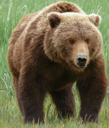

In [14]:
im = Image.open(dest_try)
im.to_thumb(128,128)

In [15]:
bear_types = 'grizzly','black','teddy'
path = Path('bears')

In [16]:
# if not path.exists():
#     path.mkdir()
#     for o in bear_types:
#         dest = (path/o)
#         dest.mkdir(exist_ok=True)
#         results = search_images_bing(key, f'{o} bear')
#         download_images(dest, urls=results.attrgot('contentUrl'))

In [17]:
if not path.exists(): # c: if the folder ('bears') doesn't exist, create that folder
    path.mkdir()
    for o in bear_types:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        results = search_images_ddg_corrected(f'{o} bear')
        download_images(dest, urls=results) # c: download all the URLs for each of our search terms

In [18]:
fns = get_image_files(path)
fns

(#735) [Path('bears/grizzly/00000001.jpg'),Path('bears/grizzly/00000002.jpg'),Path('bears/grizzly/00000000.jpg'),Path('bears/grizzly/00000003.jpg'),Path('bears/grizzly/00000004.jpg'),Path('bears/grizzly/00000010.jpg'),Path('bears/grizzly/00000007.jpg'),Path('bears/grizzly/00000009.jpg'),Path('bears/grizzly/00000015.png'),Path('bears/grizzly/00000012.jpg')...]

In [19]:
# c: Find images in fns that can't be opened
failed = verify_images(fns)
failed

(#0) []

In [20]:
# c: Removes all the failed images
failed.map(Path.unlink);

### Sidebar: Getting Help in Jupyter Notebooks

### End sidebar

## From Data to DataLoaders

Assemble the data in a format suitable for model training by creating an object called
`DataLoaders`

In [21]:
# c: this is an API block that allows customization of every stage of the creation of the DataLoaders
bears = DataBlock(
    blocks=(ImageBlock, CategoryBlock), # c: a tuple specifying the types we want for the independent and dependent variables
    get_items=get_image_files, # c: takes a path, and returns a list of all of the images in that path (recursively, by default)
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label, # c: telling fastai what function to call to create the labels in our dataset
    # c:  simply gets the name of the folder a file is in
    item_tfms=Resize(128)) # c: images need to be of the same size bec it is being fed to the model by batch
    # c: To group them in a big array (usually called a tensor) that is going to go through our model, they all need to be of the same size

In [22]:
dls = bears.dataloaders(path) # c:  template for creating a DataLoaders with path of the images as its parameter

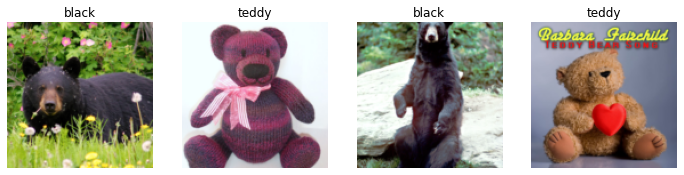

In [23]:
dls.valid.show_batch(max_n=4, nrows=1)

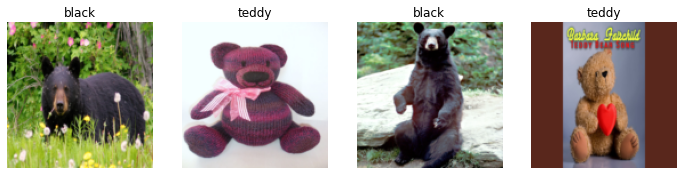

In [24]:
bears = bears.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

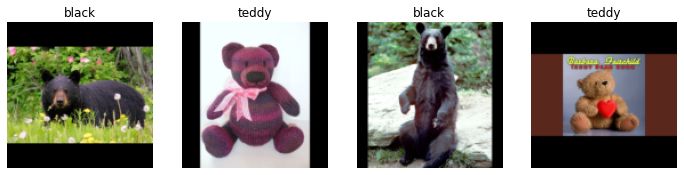

In [25]:
# c: pad the images with zeros (black)

bears = bears.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros'))
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

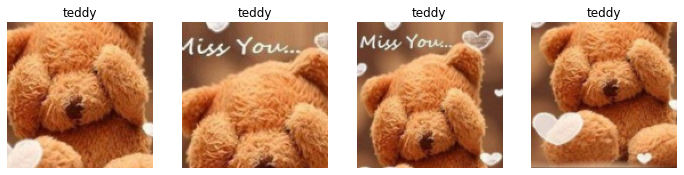

In [26]:
# c: randomly select part of the image and then crop to just that part
# c: min_scale = determines how much of the image to select at minimum each time

bears = bears.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = bears.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

### Data Augmentation

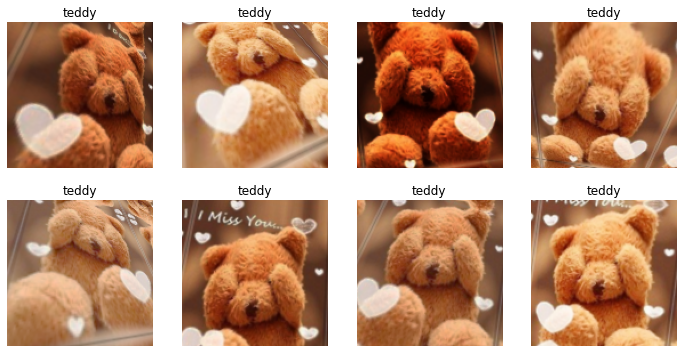

In [27]:
bears = bears.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = bears.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

## Training Your Model, and Using It to Clean Your Data

In [28]:
bears = bears.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = bears.dataloaders(path)

In [29]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.884881,0.035100,0.013605,00:26


epoch,train_loss,valid_loss,error_rate,time
0,0.103671,0.023717,0.013605,00:27
1,0.093443,0.014728,0.006803,00:27
2,0.072792,0.013526,0.006803,00:26
3,0.059937,0.014262,0.006803,00:26


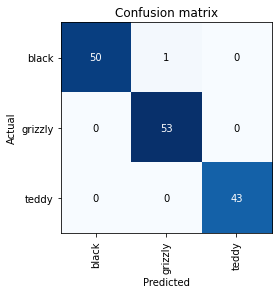

In [30]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

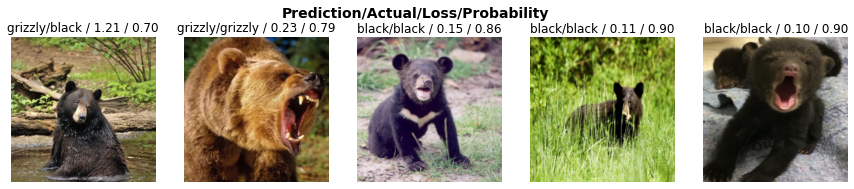

In [31]:
# c: loss is a number that is higher if the model is incorrect or if it’s correct but not confident of its correct answer
# c:  'plot_top_losses' shows us the images with the highest loss in our dataset
interp.plot_top_losses(5, nrows=1)

In [32]:
cleaner = ImageClassifierCleaner(learn)
cleaner

In [33]:
fns[0]

Path('bears/grizzly/00000001.jpg')

In [34]:
print(str(cleaner.fns[0]))

bears/black/00000158.jpg


In [35]:
#hide
# for idx in cleaner.delete(): cleaner.fns[idx].unlink()
# for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

# c: idx = index of the pic, cat = the supposed-to-be category of the pic

## Turning Your Model into an Online Application

### Using the Model for Inference

In [36]:
# c: 'export' saves the model (its architecture and parameters)
# c: it even saves the definition of how to create your DataLoaders
learn.export()

In [37]:
path = Path()
path.ls(file_exts='.pkl') # c: check if file exists

(#1) [Path('export.pkl')]

In [38]:
learn_inf = load_learner(path/'export.pkl') 

In [39]:
learn_inf.predict('images/grizzly.jpg')

# c: output format - predicted category, the index of the predicted category, and the probabilities of each category

('grizzly', tensor(1), tensor([1.1549e-04, 9.9988e-01, 1.7573e-07]))

In [40]:
learn_inf.dls.vocab

['black', 'grizzly', 'teddy']

### Creating a Notebook App from the Model

In [41]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [42]:
#hide
# For the book, we can't actually click an upload button, so we fake it
btn_upload = SimpleNamespace(data = ['images/grizzly.jpg'])

In [43]:
# c: code will get the last uploaded image, hence the indexing -1
img = PILImage.create(btn_upload.data[-1])

In [44]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [45]:
pred,pred_idx,probs = learn_inf.predict(img)

In [46]:
print(pred,pred_idx,probs)

grizzly tensor(1) tensor([1.1549e-04, 9.9988e-01, 1.7573e-07])


In [47]:
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: grizzly; Probability: 0.9999')

In [48]:
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [49]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [50]:
#hide
#Putting back btn_upload to a widget for next cell
btn_upload = widgets.FileUpload()

In [51]:
VBox([widgets.Label('Select your bear!'), 
      btn_upload, btn_run, out_pl, lbl_pred])

### Turning Your Notebook into a Real App

In [52]:
#hide
# c: Cells that begin with a ! do not contain Python code, but instead contain code that is passed to your shell (bash, Windows PowerShell, etc.)
!pip install voila
!jupyter serverextension enable --sys-prefix voila # c:  connects voila to your existing Jupyter notebook

  Using cached https://files.pythonhosted.org/packages/13/2f/acbe7006548f3914456ee47f97a2033b1b2f3daf921b12ac94105d87c163/nbconvert-6.0.7-py3-none-any.whl
ERROR: nbdev 1.1.12 has requirement nbconvert<6, but you'll have nbconvert 6.0.7 which is incompatible.
ERROR: google-colab 1.0.0 has requirement tornado~=5.1.0; python_version >= "3.0", but you'll have tornado 6.1 which is incompatible.
  Found existing installation: nbconvert 5.6.1
    Uninstalling nbconvert-5.6.1:
      Successfully uninstalled nbconvert-5.6.1


Enabling: voila
- Writing config: /usr/etc/jupyter
    - Validating...
Error loading server extension voila
      X is voila importable?


### Deploying your app

## How to Avoid Disaster

### Unforeseen Consequences and Feedback Loops

## Get Writing!

## Questionnaire

1. Provide an example of where the bear classification model might work poorly in production, due to structural or style differences in the training data.
1. Where do text models currently have a major deficiency?
1. What are possible negative societal implications of text generation models?
1. In situations where a model might make mistakes, and those mistakes could be harmful, what is a good alternative to automating a process?
1. What kind of tabular data is deep learning particularly good at?
1. What's a key downside of directly using a deep learning model for recommendation systems?
1. What are the steps of the Drivetrain Approach?
1. How do the steps of the Drivetrain Approach map to a recommendation system?
1. Create an image recognition model using data you curate, and deploy it on the web.
1. What is `DataLoaders`?
1. What four things do we need to tell fastai to create `DataLoaders`?
1. What does the `splitter` parameter to `DataBlock` do?
1. How do we ensure a random split always gives the same validation set?
1. What letters are often used to signify the independent and dependent variables?
1. What's the difference between the crop, pad, and squish resize approaches? When might you choose one over the others?
1. What is data augmentation? Why is it needed?
1. What is the difference between `item_tfms` and `batch_tfms`?
1. What is a confusion matrix?
1. What does `export` save?
1. What is it called when we use a model for getting predictions, instead of training?
1. What are IPython widgets?
1. When might you want to use CPU for deployment? When might GPU be better?
1. What are the downsides of deploying your app to a server, instead of to a client (or edge) device such as a phone or PC?
1. What are three examples of problems that could occur when rolling out a bear warning system in practice?
1. What is "out-of-domain data"?
1. What is "domain shift"?
1. What are the three steps in the deployment process?

### Further Research

1. Consider how the Drivetrain Approach maps to a project or problem you're interested in.
1. When might it be best to avoid certain types of data augmentation?
1. For a project you're interested in applying deep learning to, consider the thought experiment "What would happen if it went really, really well?"
1. Start a blog, and write your first blog post. For instance, write about what you think deep learning might be useful for in a domain you're interested in.